In [1]:
import pandas as pd

normal_doh_traffic_dataset = '/content/normal_doh_traffic_cloudflare_server.csv'
malicious_doh_traffic_dataset = '/content/dnscat2_data_4.csv'

normal_traffic_df = pd.read_csv(normal_doh_traffic_dataset)
malicious_traffic_df = pd.read_csv(malicious_doh_traffic_dataset)

normal_traffic_df.head()
malicious_traffic_df.head()



,bytes_out,num_pkts_out,bytes_in,num_pkts_in,bytes_ration,num_pkts_ration,time,av_pkt_size_in,av_pkt_size_out,var_pkt_size_in,var_pkt_size_out,median_in,median_out,mindelay,avgdelay,maxdelay,is_doh
0,0.008161,0.007220,0.005402,0.004601,0.015788,0.472420,0.109359,0.014784,0.219169,0.000845,0.043973,0.024431,0.219169,0.0,0.025787,0.133319,4
1,0.007925,0.007001,0.005310,0.004494,0.015971,0.475742,0.108966,0.014937,0.219992,0.001648,0.042766,0.024583,0.219992,0.0,0.026402,0.133434,4
2,0.007927,0.007001,0.005307,0.004494,0.015957,0.475742,0.108686,0.014924,0.220146,0.001648,0.042823,0.024570,0.220146,0.0,0.026335,0.133194,4
3,0.033504,0.029209,0.030564,0.018976,0.022046,0.484338,0.109759,0.023958,0.222640,0.000929,0.040278,0.033516,0.222640,0.0,0.006337,0.133176,4
4,0.052905,0.046056,0.049718,0.029998,0.022747,0.485913,0.109686,0.024939,0.222903,0.000833,0.039963,0.034487,0.222903,0.0,0.004011,0.135245,4


In [2]:

contamination = 0.3
seed = 1

num_malicious = min(
    malicious_traffic_df.shape[0],
    int(normal_traffic_df.shape[0] * contamination)
)

data_evaluation_malicious = malicious_traffic_df.sample(
    num_malicious,
    random_state=seed
)

# Concatenate normal and malicious traffic
data_evaluation_df = pd.concat([
    normal_traffic_df,
    data_evaluation_malicious
])

# Shuffle the dataset
data_evaluation_df = data_evaluation_df.sample(
    data_evaluation_df.shape[0],
    random_state=seed
).reset_index(drop=True)

# Display combined dataset
data_evaluation_df.head()


,bytes_out,num_pkts_out,bytes_in,num_pkts_in,bytes_ration,num_pkts_ration,time,av_pkt_size_in,av_pkt_size_out,var_pkt_size_in,var_pkt_size_out,median_in,median_out,mindelay,avgdelay,maxdelay,is_doh
0,0.124673,0.145840,0.127439,0.150519,0.340385,0.661054,0.999391,0.142871,0.299224,0.034457,0.083452,0.255268,0.299224,0.0,0.306488,0.272718,1
1,0.000258,0.000269,0.000869,0.000280,0.999414,0.583333,0.001198,0.928255,0.449892,0.999763,0.645340,0.937663,0.449892,0.0,0.198594,0.134331,1
2,0.114936,0.136475,0.100370,0.137540,0.290792,0.645488,0.999950,0.102303,0.277707,0.022254,0.087854,0.220019,0.277707,0.0,0.331587,0.193173,1
3,0.038702,0.036648,0.043197,0.042304,0.026989,0.860900,0.033530,0.011569,0.184197,0.000441,0.027670,0.021248,0.184197,0.0,0.001112,0.001030,4
4,0.003686,0.004260,0.004137,0.004393,0.370646,0.654762,0.028277,0.175847,0.316196,0.101131,0.128858,0.283920,0.316196,0.0,0.296999,0.136355,1


In [3]:
label_col = 'is_doh'
normal_traffic_label = 1

# Convert malicious labels (>1) to -1
data_evaluation_df.loc[
    data_evaluation_df[label_col] > normal_traffic_label,
    label_col
] = -1

# Check label distribution
data_evaluation_df[label_col].value_counts()


,count
is_doh,
1,2350
-1,705


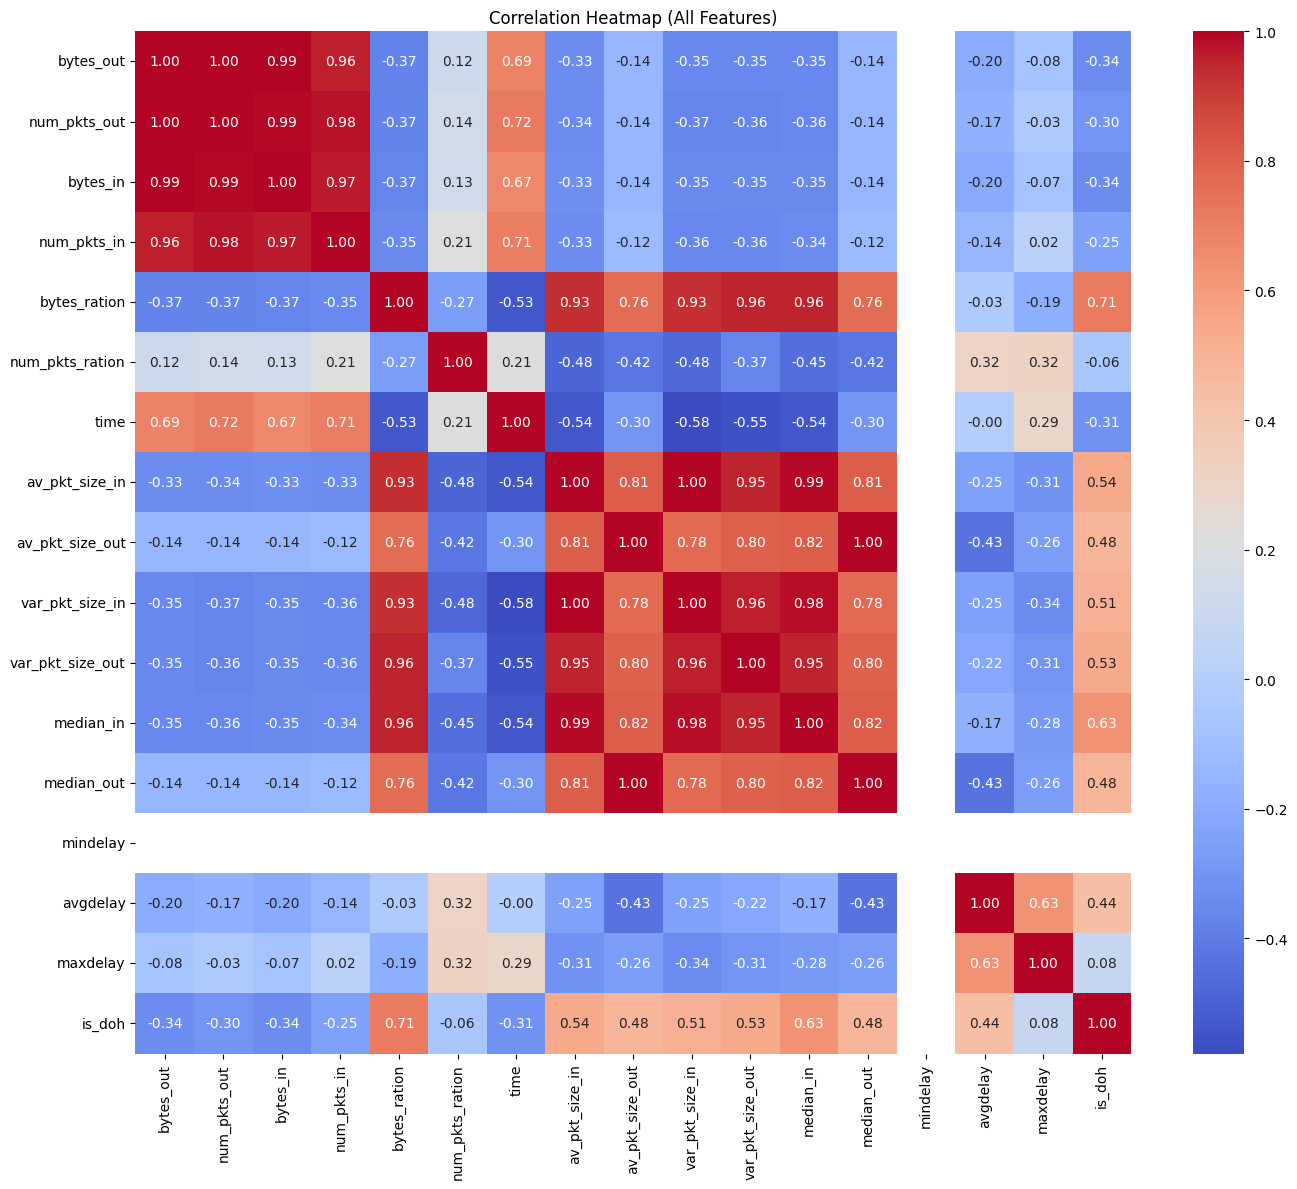

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for visualization
data_visualization = data_evaluation_df.sample(n=700, random_state=1)

# Compute correlation matrix
correlation_matrix = data_visualization.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (All Features)')
plt.tight_layout()
plt.show()



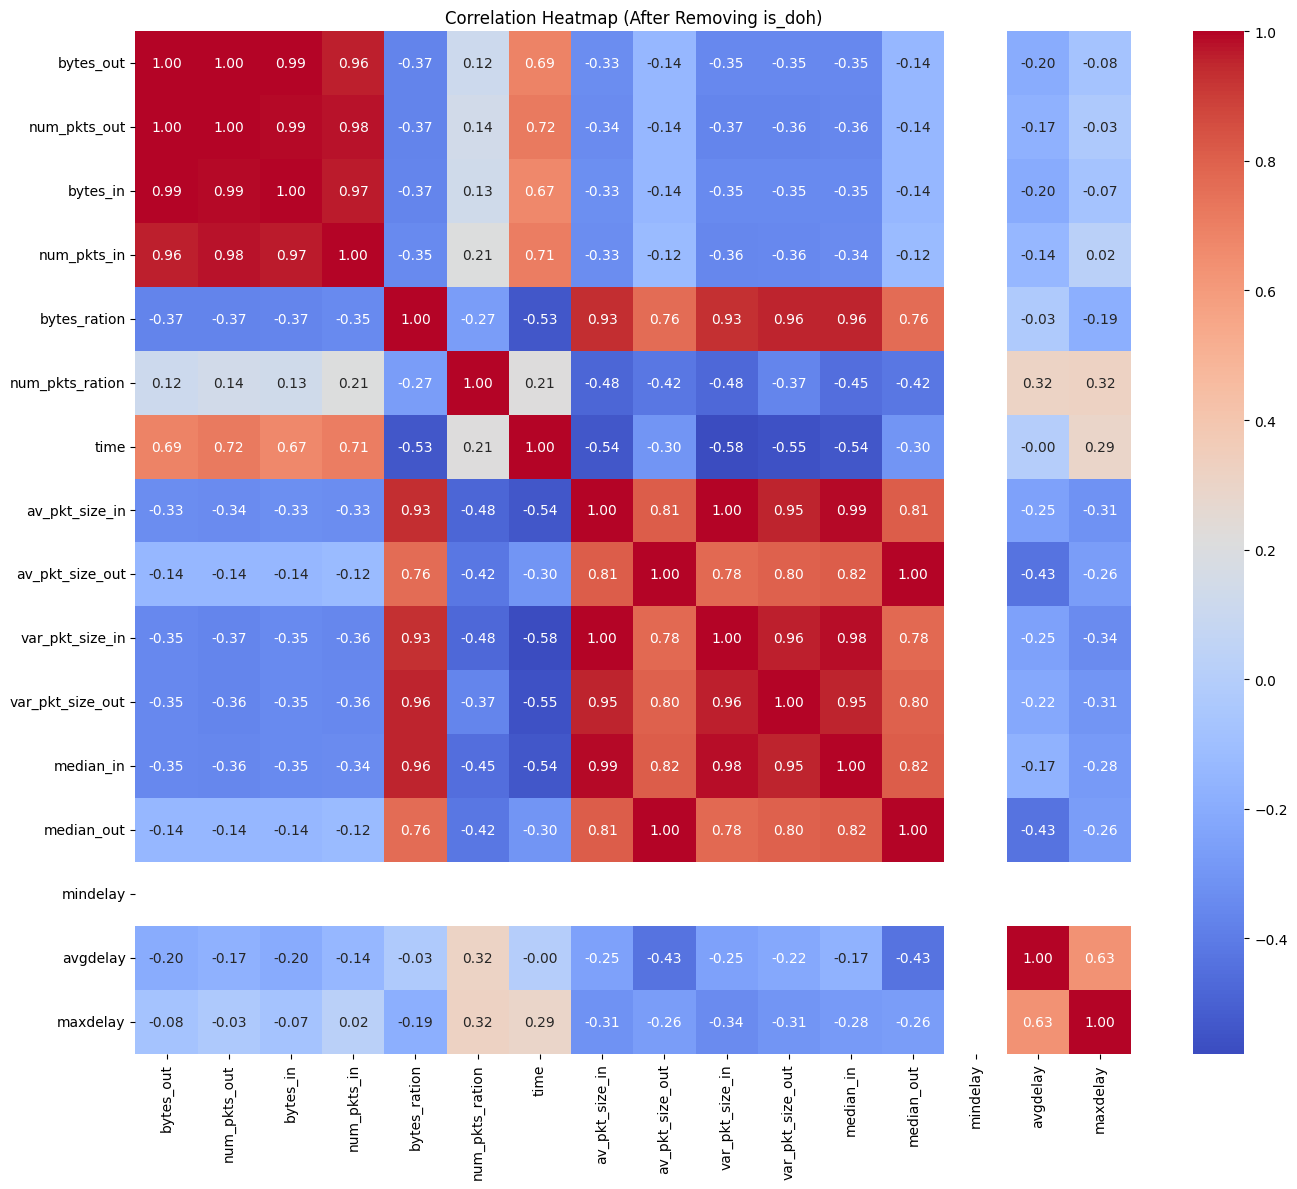

In [5]:
correlation_matrix_reduced = correlation_matrix.drop(
    index='is_doh',
    columns='is_doh'
)

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (After Removing is_doh)')
plt.tight_layout()
plt.show()


In [6]:
data_evaluation_df_vis = data_evaluation_df.copy()

data_evaluation_df_vis.loc[
    data_evaluation_df_vis[label_col] == -1,
    label_col
] = 'malicious'

data_evaluation_df_vis.loc[
    data_evaluation_df_vis[label_col] == 1,
    label_col
] = 'benign'

data_evaluation_df_vis[label_col].value_counts()


/tmp/ipython-input-834580423.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'malicious' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_evaluation_df_vis.loc[


,count
is_doh,
benign,2350
malicious,705


# Traffic Volume Features Pairplot

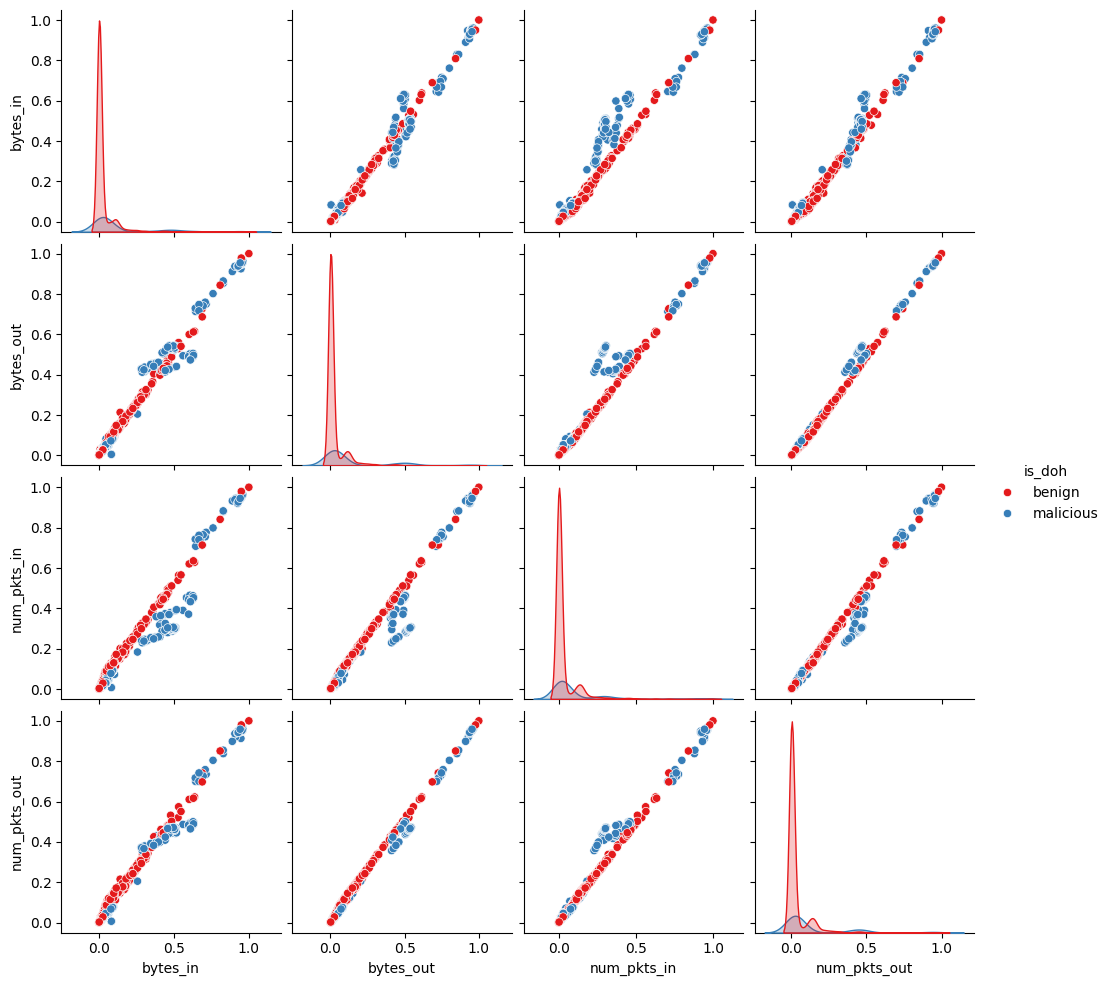

In [7]:
subset1 = ['bytes_in', 'bytes_out', 'num_pkts_in', 'num_pkts_out']

sns.pairplot(
    data_evaluation_df_vis,
    vars=subset1,
    diag_kind='kde',
    hue=label_col,
    palette='Set1'
)

plt.show()


# Packet Size Statistics Pairplot

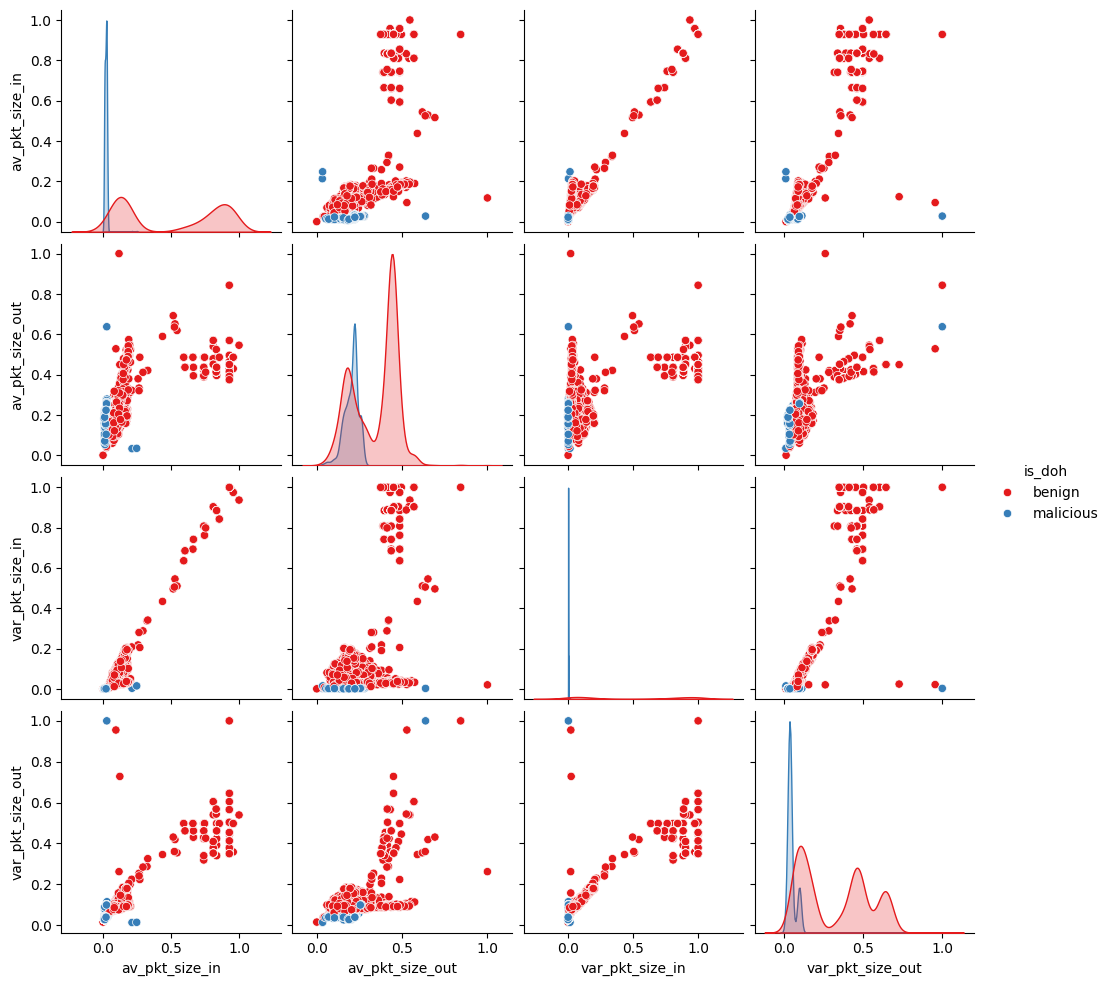

In [9]:
subset2 = ['av_pkt_size_in', 'av_pkt_size_out',
 'var_pkt_size_in', 'var_pkt_size_out']


sns.pairplot(
    data_evaluation_df_vis,
    vars=subset2,
    diag_kind='kde',
    hue=label_col,
    palette='Set1'
)

plt.show()


# Median and Ratio Features Pairplot

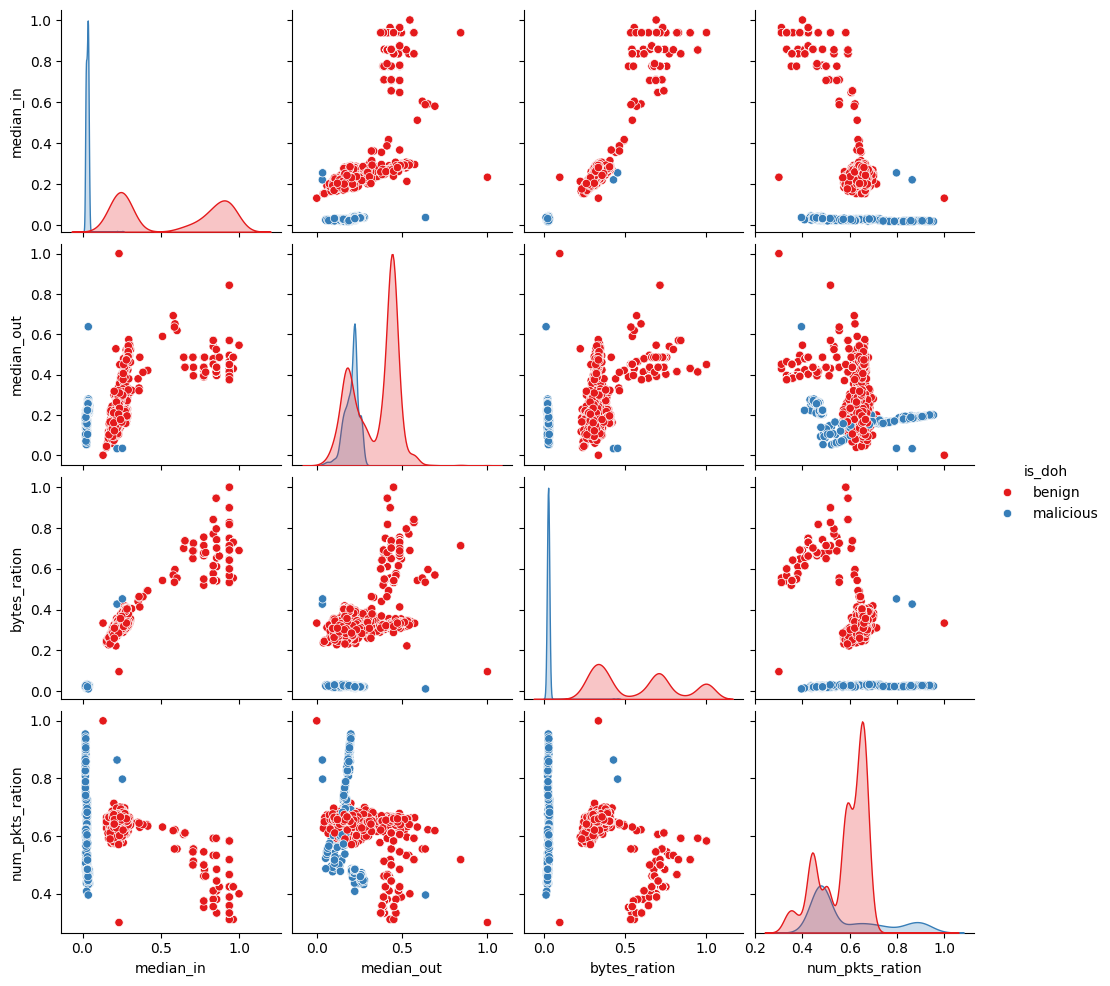

In [10]:
subset3 = ['median_in', 'median_out',
 'bytes_ration', 'num_pkts_ration']

sns.pairplot(
    data_evaluation_df_vis,
    vars=subset3,
    diag_kind='kde',
    hue=label_col,
    palette='Set1'
)

plt.show()

# Time and Delay Features Pairplot

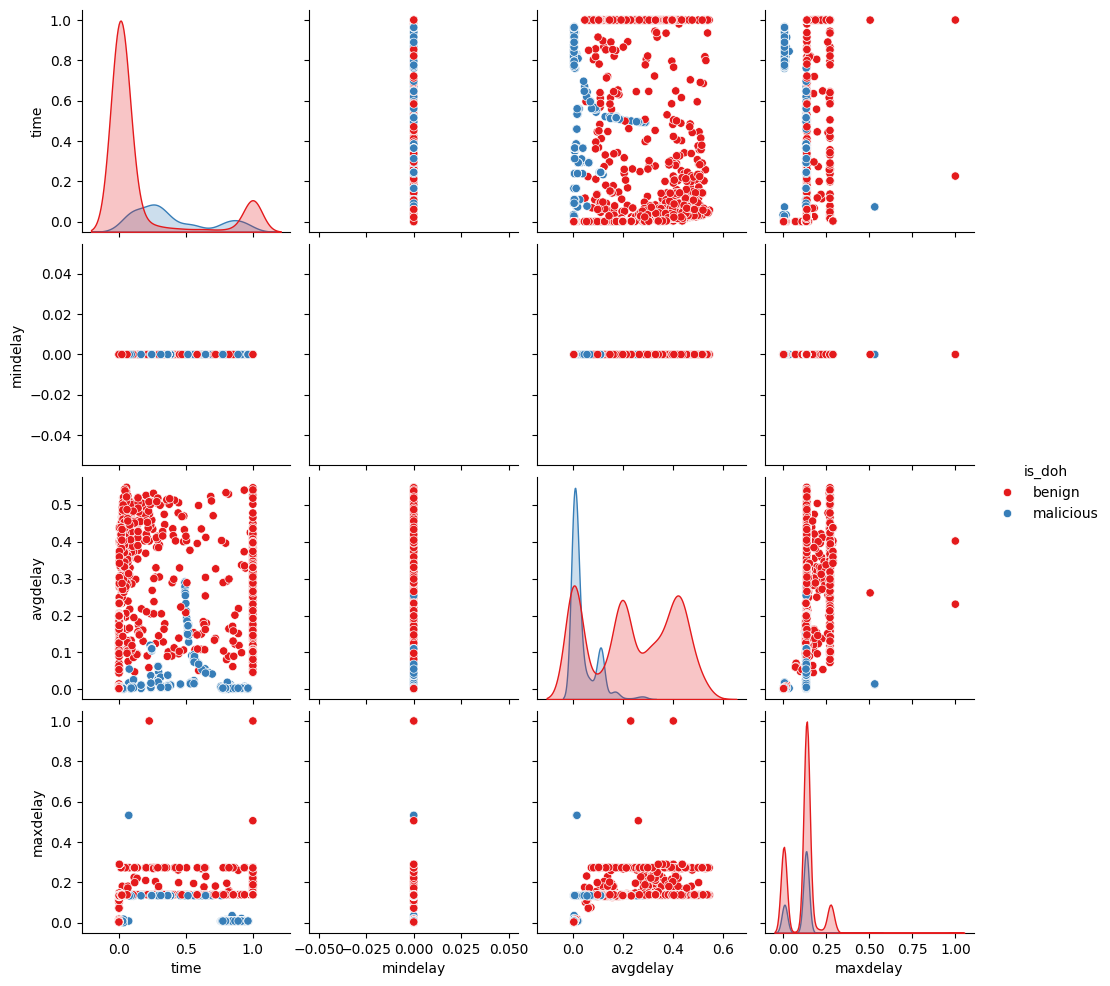

In [11]:
subset4 = ['time', 'mindelay', 'avgdelay', 'maxdelay']


sns.pairplot(
    data_evaluation_df_vis,
    vars=subset4,
    diag_kind='kde',
    hue=label_col,
    palette='Set1'
)

plt.show()